<a href="https://colab.research.google.com/github/gebakkenAardappel/WINC/blob/main/Kopie_van_Global_CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions#Per_capita_CO2_emissions")
countries = tables[1]  #het is de tweede tabel binnen wikipedia

In [ ]:
countries.columns = ["country","y1990","y2005","y2017","2017_wereld%", "2017vs1990%", "2017perkm2.jaar","2017percap.jaar", "2018inclLUCF","2018ecxlLUCF" ] # rename columns
%load_ext google.colab.data_table 
#countries

In [ ]:
countries=countries.loc[3:, ["country" ,"y1990","y2005","y2017"]]  # alleen 1990, 2005 en 2017 gebruiken en alleen landen. Dit geeft nog 208 entries
countries=countries.drop([67])
# countries

In [ ]:
big5= countries.loc[countries.y2017>1300.0]
big5.columns=["country" ,"1990", "2005", "2017"]
big5

,country,1990,2005,2017
42,China,2397.048,6263.064,10877.218
93,India,605.968,1210.754,2454.774
102,Japan,1149.400,1276.863,1320.776
158,Russia,2378.921,1733.950,1764.866
202,United States,5085.897,5971.571,5107.393


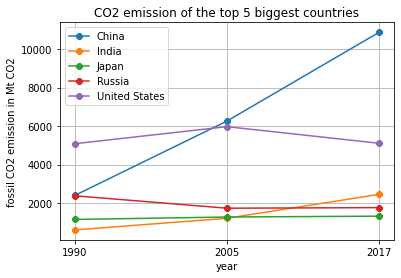

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

years = big5.columns[1:]                       # in kolom index 1-tot-eind staan de jaartallen voor de x-as
for index, column in big5.iterrows():          # loop voor elke kolom de rijen door in big5
  plt.plot(years, column[1:], label=column[0], marker="8") # plot de data vanaf kolom 1 en gebruik het label uit kolom 0

ax.legend()                                    # maak legenda , titels etc. in orde
ax.set_title("CO2 emission of the top 5 biggest countries")
ax.set_xlabel("year")
ax.set_ylabel("fossil CO2 emission in Mt CO2")
ax.grid(True)




In [ ]:
#relatieve verandering t.o.v. 1990 berekenen. 
for index, row in countries.iterrows():
  relative2017 = (countries.y2017/countries.y1990)*100
  relative2005 = (countries.y2005/countries.y1990)*100
  relative1990 = (countries.y1990/countries.y1990)*100
# nieuwe kolommen toevoegen aan database
countries['relative1990'] = relative1990
countries['relative2005'] = relative2005
countries['relative2017'] = relative2017

countries

,country,y1990,y2005,y2017,relative1990,relative2005,relative2017
3,Afghanistan,2.546,1.063,11.422,100.0,41.751767,448.625295
4,Albania,6.583,4.196,5.026,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,100.0,149.515051,243.508382
6,Angola,5.851,15.975,30.876,100.0,273.030251,527.704666
7,Anguilla,0.006,0.014,0.028,100.0,233.333333,466.666667
...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,100.0,491.680706,1083.782579
208,Western Sahara,0.144,0.227,0.276,100.0,157.638889,191.666667
209,Yemen,6.887,21.768,12.503,100.0,316.073762,181.544940
210,Zambia,2.955,2.457,4.967,100.0,83.147208,168.087986


In [ ]:
# de landen met de drie hoogste relatieve waarden berekenen voor 2017 (slechts presterende landen)
extreme_high=countries.nlargest(n=3, columns=['relative2017'])
extreme_high

,country,y1990,y2005,y2017,relative1990,relative2005,relative2017
81,Greenland,0.003,0.631,0.518,100.0,21033.333333,17266.666667
34,Cambodia,0.407,2.686,10.560,100.0,659.950860,2594.594595
62,Equatorial Guinea,0.097,3.371,2.469,100.0,3475.257732,2545.360825


In [ ]:
# de landen met de drie laagste relatieve waarden berekenen voor 2017 (best presterende landen)
extreme_low=countries.nsmallest(n=3, columns=['relative2017'])
extreme_low

,country,y1990,y2005,y2017,relative1990,relative2005,relative2017
10,Armenia,20.699,4.542,4.832,100.0,21.943089,23.344123
128,Moldova,31.957,8.139,8.263,100.0,25.468598,25.856620
199,Ukraine,783.210,354.429,205.723,100.0,45.253380,26.266646


In [ ]:
# de best en slechts presterende top 3 samenvoegen in een nieuw dataframe om te plotten
extremes=extreme_high.append(extreme_low, ignore_index=True)
extremes= extremes.loc[:, ["country","relative1990","relative2005","relative2017"]]
extremes.columns=["country","1990","2005","2017"]
extremes

,country,1990,2005,2017
0,Greenland,100.0,21033.333333,17266.666667
1,Cambodia,100.0,659.950860,2594.594595
2,Equatorial Guinea,100.0,3475.257732,2545.360825
3,Armenia,100.0,21.943089,23.344123
4,Moldova,100.0,25.468598,25.856620
5,Ukraine,100.0,45.253380,26.266646


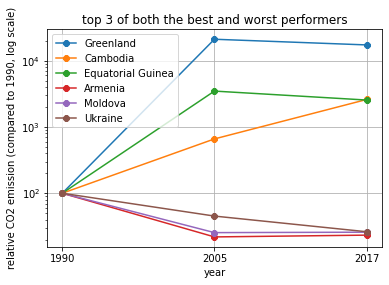

In [ ]:
fig, ax = plt.subplots()

# in kolom index 1-tot-eind staan de jaartallen voor de x-as
years = extremes.columns[1:]          

 # loop alle rijen door, plot de data vanaf kolom 1 en gebruik het label uit kolom 0
for index, row in extremes.iterrows():               
  plt.plot(years, row[1:], label=row[0], marker="8") 

# maak legenda , titels etc. in orde
ax.legend()                                    
ax.set_title("top 3 of both the best and worst performers")
ax.set_xlabel("year")
ax.set_ylabel("relative CO2 emission (compared to 1990, log scale)")
ax.grid(True)
plt.yscale('log')  

In [ ]:
# landen selecteren met een emissie vanaf 5 Mt in 1990 en daaruit de top 3 beste en slechtste selecteren.
countriesOver5=countries.loc[countries.y1990 >= 5]
countriesOver5.sort_values(by="y1990", ascending=True)

,country,y1990,y2005,y2017,relative1990,relative2005,relative2017
50,Curaçao,5.474,4.774,7.519,100.0,87.212276,137.358422
181,Sudan South Sudan,5.536,10.773,21.056,100.0,194.598988,380.346821
6,Angola,5.851,15.975,30.876,100.0,273.030251,527.704666
111,Lebanon,5.977,16.505,23.102,100.0,276.141877,386.514974
25,Bolivia,6.287,9.998,20.462,100.0,159.026563,325.465246
...,...,...,...,...,...,...,...
77,Germany,1018.097,837.284,796.529,100.0,82.240101,78.237044
102,Japan,1149.400,1276.863,1320.776,100.0,111.089525,114.910040
158,Russia,2378.921,1733.950,1764.866,100.0,72.888087,74.187667
42,China,2397.048,6263.064,10877.218,100.0,261.282377,453.775561


# Nieuwe sectie

In [ ]:
extreme_low5=countriesOver5.nsmallest(n=3, columns=['relative2017'])
#extreme_low5
extreme_high5=countriesOver5.nlargest(n=3, columns=['relative2017'])
extreme_high5

,country,y1990,y2005,y2017,relative1990,relative2005,relative2017
207,Vietnam,20.182,99.231,218.729,100.0,491.680706,1083.782579
144,Oman,11.884,32.964,78.421,100.0,277.381353,659.887243
17,Bangladesh,13.868,38.834,84.546,100.0,280.025959,609.648111


In [ ]:
extremes5=extreme_high5.append(extreme_low5, ignore_index=True)
extremes5= extremes5.loc[:, ["country","relative1990","relative2005","relative2017"]]
extremes5.columns=["country","1990","2005","2017"]
extremes5

,country,1990,2005,2017
0,Vietnam,100.0,491.680706,1083.782579
1,Oman,100.0,277.381353,659.887243
2,Bangladesh,100.0,280.025959,609.648111
3,Armenia,100.0,21.943089,23.344123
4,Moldova,100.0,25.468598,25.856620
5,Ukraine,100.0,45.253380,26.266646


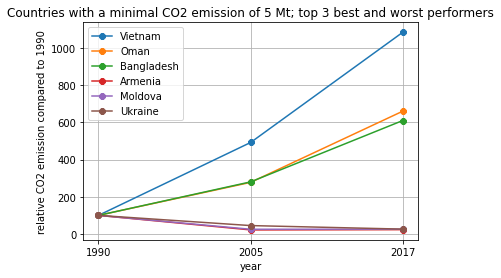

In [ ]:
fig, ax = plt.subplots()

# in kolom index 1-tot-eind staan de jaartallen voor de x-as
years = extremes5.columns[1:]          

 # loop alle rijen door, plot de data vanaf kolom 1 en gebruik het label uit kolom 0
for index, row in extremes5.iterrows():               
  plt.plot(years, row[1:], label=row[0], marker="8") 

# maak legenda , titels etc. in orde
ax.legend()                                    
ax.set_title("Countries with a minimal CO2 emission of 5 Mt; top 3 best and worst performers")
ax.set_xlabel("year")
ax.set_ylabel("relative CO2 emission compared to 1990")
ax.grid(True)